# Manual create synthetic text

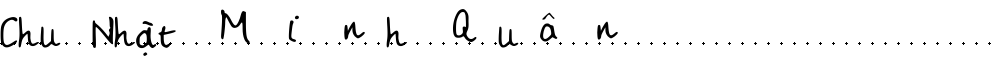

In [2]:
from PIL import Image, ImageDraw, ImageFont

def add_dots_below_text(text, font_path,
                        font_size, dot_size=2,
                        dot_spacing=13, height_of_rows_dots=8):
    """Function to create an image with specific text, font style, font size"""
    # Load the font
    font = ImageFont.truetype(font_path, font_size)

    # Create a blank image with white background
    text_width, text_height = 1000, 50
    image = Image.new('RGB', (text_width, text_height + 8), color='white')

    # Draw text on the image using your font and desired color
    draw = ImageDraw.Draw(image)
    draw.text((0, 0), text, fill='black', font=font)

    # Move dots closer to the text (adjust dot_position)
    dot_position = text_height  -  height_of_rows_dots # Position the dots just below the text
    # print(text_height)
    for x in range(0, text_width, dot_spacing):
        draw.ellipse((x, dot_position, x + dot_size, dot_position + dot_size), fill='black')

    return image

text = 'Chu Nhật Minh Quân'
font_path = 'output/Quan/quan.ttf'
# font_size_text = 60, font_size_number = 90
font_size = 60
image = add_dots_below_text(text, font_path, font_size)
image